In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
full_train=pd.read_csv('E:\\downloads(16)\\titanic\\train.csv')
full_test=pd.read_csv('E:\\downloads(16)\\titanic\\train.csv')
full_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning

we can see that Age and Cabin have lot of non-null values. Embarked has few  

remove rows with exactly same name

In [4]:
full_train = full_train.drop_duplicates(subset=['Name']).reset_index(drop=True)
len(full_train)

891

In [5]:
len(full_train['Cabin'].unique())

148

we can see out of 204 cabin names 148 are unique

converting all male to '1' and female to '0'

In [6]:
full_train['Sex'] = full_train['Sex'].apply(lambda x: 1 if x.lower().strip() == 'male' else 0 )

seperating names to first and last names 

In [7]:
full_train[['Last Name', 'First Name']] = full_train['Name'].str.split(', ', n=1, expand=True)

In [8]:
full_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


in case there is someone with same last name does not have a cabin number, we can say they are in the same cabin

In [9]:
for last_name in full_train['Last Name'].unique():
    same_last_name_rows = full_train[full_train['Last Name'] == last_name]
    cabin_number = same_last_name_rows['Cabin'].dropna().unique()
    if len(cabin_number)==0:
        pass
    elif len(cabin_number) <len(same_last_name_rows):
        cabin_number = cabin_number[0]  # Take the first available cabin number if multiple exist
        
        # Assign this cabin number to rows with the same last name that lack a cabin number
        full_train.loc[(full_train['Last Name'] == last_name) & (full_train['Cabin'].isna()), 'Cabin'] = cabin_number



In [10]:
full_train['Cabin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
224 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


from 204 , 224 cabin number is obtained. 

now we can seperate the ticket column in two columns; ticket heading, ticket number

In [11]:
def split_ticket(ticket):
    # Split into heading and number
    heading = ''.join(filter(str.isalpha, ticket))  # Keep only letters
    number = ''.join(filter(str.isdigit, ticket))   # Keep only digits
    heading = heading.replace('.', '').replace(' ', '')  # Remove dots and spaces
    return pd.Series([heading, number])

# Apply the function and create new columns
full_train[['Ticket Heading', 'Ticket Number']] = full_train['Ticket'].apply(split_ticket)

In [12]:
full_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name,Ticket Heading,Ticket Number
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,S,Montvila,Rev. Juozas,,211536
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,S,Graham,Miss. Margaret Edith,,112053
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie""",WC,6607
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,C,Behr,Mr. Karl Howell,,111369
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,Q,Dooley,Mr. Patrick,,370376


In [13]:
full_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

we can do OneHotEncoding for Embarked Column because it is a categorical column

In [14]:
full_train = pd.get_dummies(full_train, columns=['Embarked'], prefix='Embarked')
full_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Last Name,First Name,Ticket Heading,Ticket Number,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,Braund,Mr. Owen Harris,A,521171,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,Cumings,Mrs. John Bradley (Florence Briggs Thayer),PC,17599,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Heikkinen,Miss. Laina,STONO,23101282,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,Futrelle,Mrs. Jacques Heath (Lily May Peel),,113803,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B5,Allen,Mr. William Henry,,373450,False,False,True


for the Age it is best to use KNN Imputer to fill up the data. I am using all columns with integer data other than PassengerId,	Survived and Ticket Number

In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
full_train[['Age','Pclass','Sex','Embarked_C','Embarked_Q','Embarked_S','SibSp','Parch','Fare']]=pd.DataFrame(imputer.fit_transform(full_train[['Age','Pclass','Sex','Embarked_C','Embarked_Q','Embarked_S','SibSp','Parch','Fare']]))

In [16]:
full_train['Age'].isnull().sum()

0

we can seperate the cabin in letters and numbers. 

In [17]:
import re
full_train['Cabin Letter'] = full_train['Cabin'].apply(lambda x: x[0] if pd.notna(x) and x[0].isalpha() else None)
full_train['Cabin Number'] = full_train['Cabin'].apply(lambda x: re.search(r'\d+', x).group() if pd.notna(x) and re.search(r'\d+', x) else None)
full_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Last Name,First Name,Ticket Heading,Ticket Number,Embarked_C,Embarked_Q,Embarked_S,Cabin Letter,Cabin Number
0,1,0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,Braund,Mr. Owen Harris,A,521171,0.0,0.0,1.0,None,None
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,C85,Cumings,Mrs. John Bradley (Florence Briggs Thayer),PC,17599,1.0,0.0,0.0,C,85
2,3,1,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,Heikkinen,Miss. Laina,STONO,23101282,0.0,0.0,1.0,None,None
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,C123,Futrelle,Mrs. Jacques Heath (Lily May Peel),,113803,0.0,0.0,1.0,C,123
4,5,0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,B5,Allen,Mr. William Henry,,373450,0.0,0.0,1.0,B,5


we can use KNeighborsClassifier model to find the Cabin Letter. for training 'Age','Fare','Embarked_C','Embarked_Q','Embarked_S','Pclass','Survived' columns will be used. For the Cabin Number we will simply fill the values with 00. 

In [18]:
train_X= full_train[full_train['Cabin Letter'].notna()][['Age','Fare','Embarked_C','Embarked_Q','Embarked_S','Pclass','Survived']]
train_Y=full_train[full_train['Cabin Letter'].notna()][['Cabin Letter']]
test_X= full_train[full_train['Cabin Letter'].isna()][['Age','Fare','Embarked_C','Embarked_Q','Embarked_S','Pclass','Survived']]

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X,train_Y)
y_pred= knn.predict(test_X)

y_pred

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array(['E', 'E', 'E', 'F', 'E', 'D', 'F', 'C', 'E', 'C', 'F', 'D', 'E',
       'E', 'E', 'E', 'F', 'C', 'B', 'F', 'E', 'A', 'F', 'C', 'B', 'A',
       'E', 'F', 'F', 'F', 'A', 'C', 'E', 'F', 'F', 'E', 'D', 'F', 'C',
       'F', 'F', 'F', 'C', 'F', 'E', 'F', 'B', 'E', 'F', 'A', 'E', 'F',
       'F', 'E', 'E', 'D', 'B', 'E', 'E', 'E', 'E', 'F', 'E', 'F', 'B',
       'F', 'B', 'F', 'D', 'D', 'E', 'E', 'B', 'F', 'C', 'E', 'E', 'E',
       'E', 'F', 'E', 'E', 'E', 'F', 'F', 'B', 'F', 'E', 'F', 'F', 'F',
       'F', 'F', 'C', 'C', 'F', 'B', 'E', 'C', 'F', 'E', 'E', 'E', 'B',
       'F', 'A', 'C', 'E', 'E', 'F', 'F', 'F', 'E', 'F', 'F', 'D', 'E',
       'F', 'A', 'E', 'E', 'D', 'B', 'E', 'F', 'E', 'E', 'C', 'A', 'D',
       'E', 'F', 'F', 'F', 'B', 'B', 'E', 'F', 'F', 'F', 'F', 'F', 'E',
       'B', 'C', 'E', 'F', 'F', 'D', 'B', 'D', 'B', 'E', 'F', 'F', 'E',
       'E', 'F', 'E', 'B', 'C', 'B', 'E', 'F', 'D', 'C', 'F', 'E', 'E',
       'E', 'E', 'E', 'E', 'B', 'F', 'E', 'E', 'E', 'F', 'F', 'F

In [20]:
full_train.loc[full_train['Cabin Letter'].isna(), 'Cabin Letter'] = y_pred


In [21]:
full_train['Cabin Number'] = full_train['Cabin Number'].fillna('00')
full_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Last Name,First Name,Ticket Heading,Ticket Number,Embarked_C,Embarked_Q,Embarked_S,Cabin Letter,Cabin Number
0,1,0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,Braund,Mr. Owen Harris,A,521171,0.0,0.0,1.0,E,00
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,C85,Cumings,Mrs. John Bradley (Florence Briggs Thayer),PC,17599,1.0,0.0,0.0,C,85
2,3,1,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,Heikkinen,Miss. Laina,STONO,23101282,0.0,0.0,1.0,E,00
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,C123,Futrelle,Mrs. Jacques Heath (Lily May Peel),,113803,0.0,0.0,1.0,C,123
4,5,0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,B5,Allen,Mr. William Henry,,373450,0.0,0.0,1.0,B,5


we can now do KNNimputing to find the missing Cabin Letter of the passengers. Here Pclass, Sex, SibSp, Parch,Fare are deciding factors 

Creating column for the passenger's age group ("Child," "Adult," "Senior") based
on the 'Age' column.

In [23]:

age_bins = [0, 12, 59, 120]  
age_labels = ['Child', 'Adult', 'Senior']  


full_train['Age Group'] = pd.cut(full_train['Age'], bins=age_bins, labels=age_labels, right=False)


In [24]:
full_train['Age Group'].unique()

['Adult', 'Child', 'Senior']
Categories (3, object): ['Child' < 'Adult' < 'Senior']

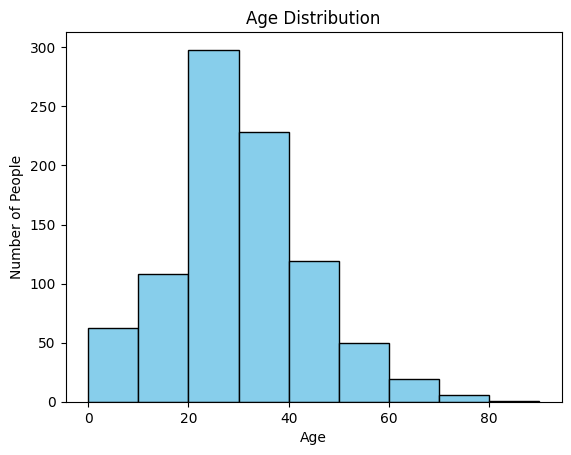

In [25]:
import matplotlib.pyplot as plt
ages= full_train['Age']
plt.hist(ages, bins=range(0,100,10), edgecolor='black', color='skyblue')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution')

# Display the plot
plt.show()

In [26]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    float64 
 3   Name            891 non-null    object  
 4   Sex             891 non-null    float64 
 5   Age             891 non-null    float64 
 6   SibSp           891 non-null    float64 
 7   Parch           891 non-null    float64 
 8   Ticket          891 non-null    object  
 9   Fare            891 non-null    float64 
 10  Cabin           224 non-null    object  
 11  Last Name       891 non-null    object  
 12  First Name      891 non-null    object  
 13  Ticket Heading  891 non-null    object  
 14  Ticket Number   891 non-null    object  
 15  Embarked_C      891 non-null    float64 
 16  Embarked_Q      891 non-null    float64 
 17  Embarked_S      

we have successfully filled in the misssing values

# Exploratory Data Analysis 

let's look at a heatmap with all the number columns 

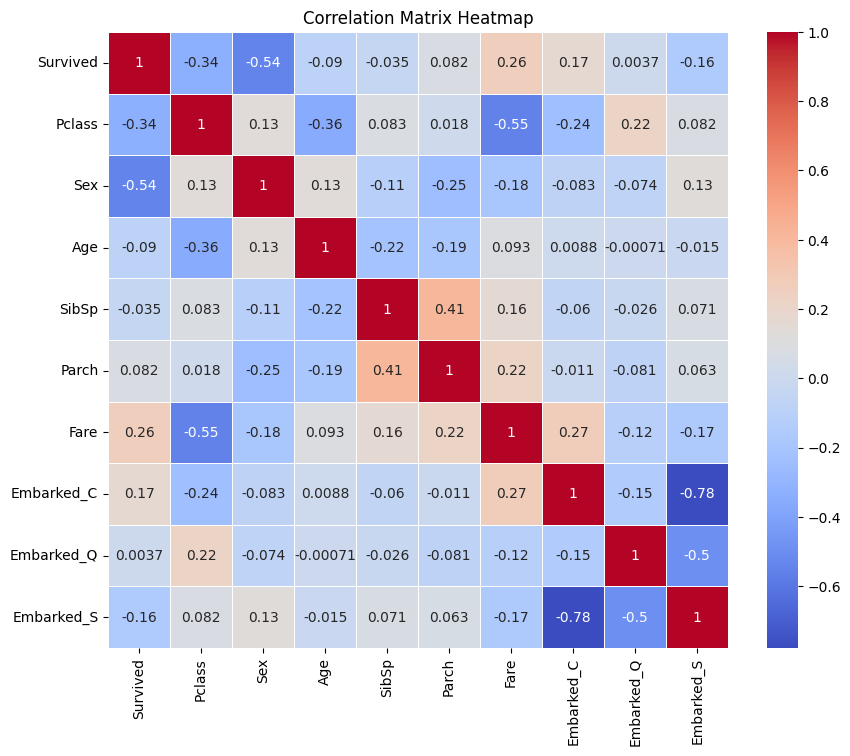

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = full_train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

we can see that 'Sex' and 'Survived' has strong relation. Also 'Age' and 'Pclass' , 'Fare' and 'Pclass', 'Survived' and 'Pclass'
have strong relation. 

let's look at distribution of genders

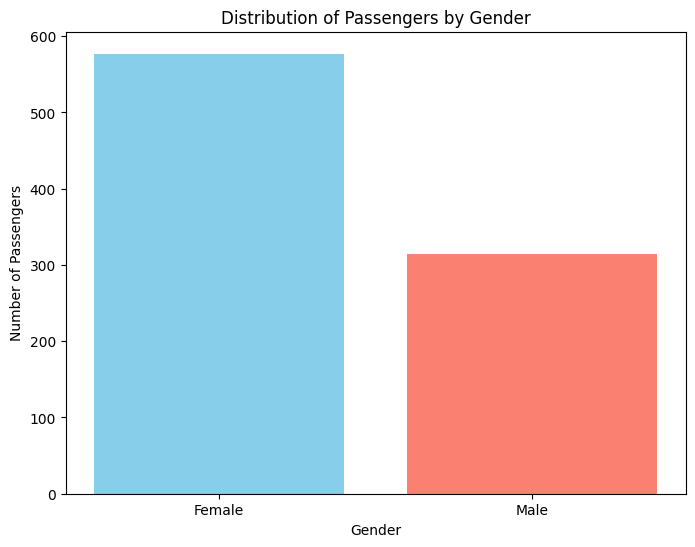

In [50]:

gender_counts = full_train['Sex'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(['Female','Male'], gender_counts.values, color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passengers by Gender')
plt.show()

Now we will look at Pie chart of 'Sex' and 'Survived'

In [32]:
survival_counts = full_train.groupby(['Sex', 'Survived']).size().unstack()


In [42]:
dict={
    1:'male',
    0:'female'
}

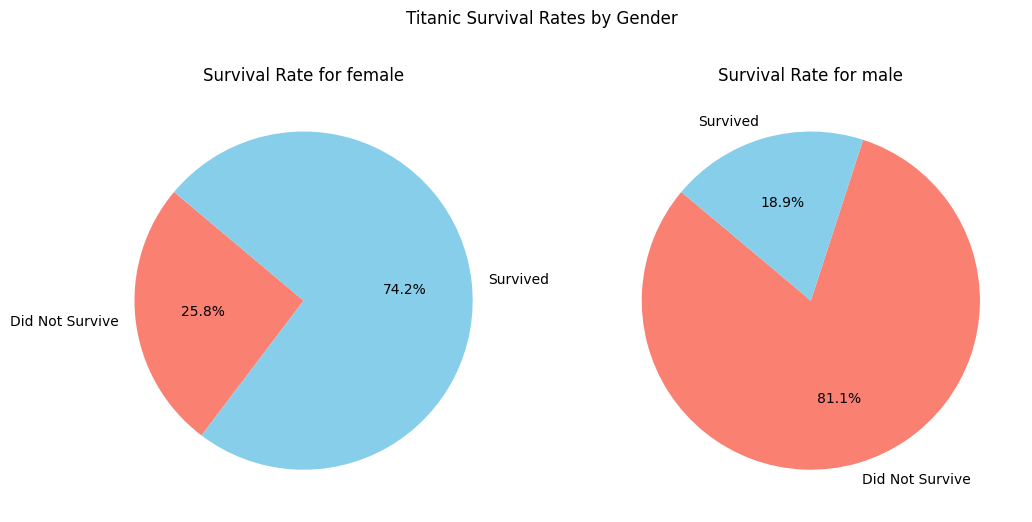

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, gender in enumerate(survival_counts.index):
    axes[i].pie(
        survival_counts.loc[gender],
        labels=['Did Not Survive', 'Survived'],
        autopct='%1.1f%%',
        startangle=140,
        colors=['salmon', 'skyblue']
    )
    axes[i].set_title(f'Survival Rate for {dict[gender]}')

plt.suptitle('Titanic Survival Rates by Gender')
plt.show()

Pie chart for 'Survived' and 'Pclass'

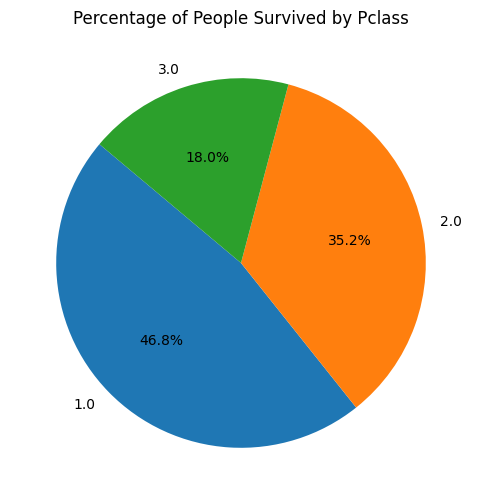

In [45]:
survival_by_class = full_train.groupby('Pclass')['Survived'].mean() * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(survival_by_class, labels=survival_by_class.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of People Survived by Pclass')
plt.show()

it is very clear that more women survived and people of lower Pclass number survived. 

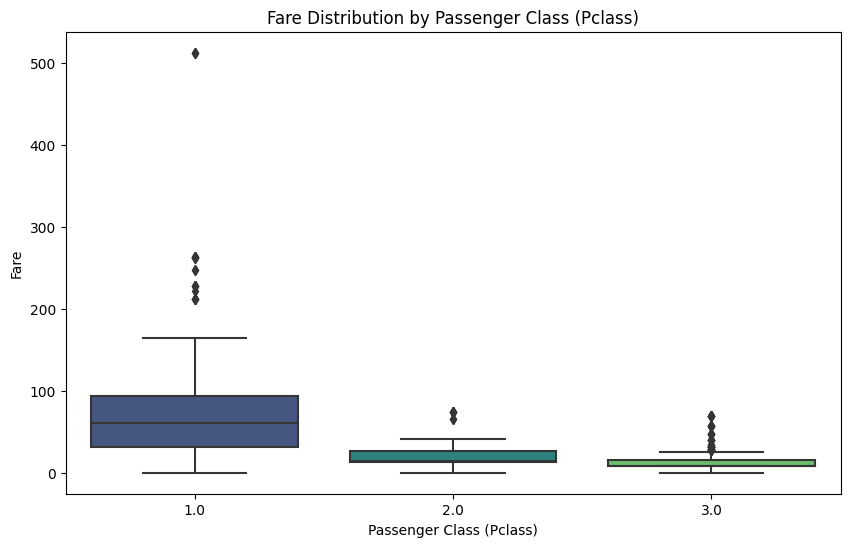

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=full_train, palette='viridis')
plt.title('Fare Distribution by Passenger Class (Pclass)')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Fare')
plt.show()

Mean, median and mode for 'Fare' and 'Age'

In [58]:
full_train[['Fare','Age']].describe(include ="all")

,Fare,Age
count,891.000000,891.00000
mean,32.204208,30.11048
std,49.693429,13.57738
min,0.000000,0.42000
25%,7.910400,21.10000
50%,14.454200,29.00000
75%,31.000000,38.00000
max,512.329200,80.00000


In [61]:
from scipy import stats

# Sample data
array1 = full_train['Sex'].to_numpy()
array2 = full_train['Survived'].to_numpy()

t_stat, p_value = stats.ttest_ind(array1, array2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 11.542166853462966
P-value: 9.01095289826796e-30


From the result obtained we can conclude that there is indeed significant difference in survival rate based on gender 